# How can we model a Pandemic???

There are a wide range of infectious disease models, as many as there are diseases, their variants and strategies to control them. However, the starting point for modeling many infectious diseases is the SIR model, which can be understood as:
* **S**: people susceptible to the disease (number of people who can get it)
* **I**: those who are infectious with the disease (can spread it)
* **R**: people recovered from the disease (they are well and not spreading)

    The SIR model is called a `compartment model` because everyone in the population is put into one of three different compartments. You find out more about the model [here](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model).

In this model, we let N be the total population, and let S0, I0, R0 be the number of susceptible, infection, and recovered people at the start of the pandemic. 

There are two parameters in this model, $\beta$ which can be thought of as the `coefficient of infection` and and $\gamma$ which can be thought of as the `coefficient of recovery`. (Disclaimer: I am not an epidemiologist and made these terms up.) 

The "official version" of this model uses calculus and/or differential equations. In this class, we will implement a discrete time version of this model. We will assume that each day
- some people move from susceptible to infected: $\beta*S*I$
- some people move from infected to recovered: $\gamma*I$

This leads to the model:
\begin{align*}
S_{t+1}-S_t&=-\beta S_t I_t,\quad (i.e. S_{t+1}=S_t-\beta S_tI_t) \\
I_{t+1}-I_t&=\beta S_t I_t - \gamma I_t\\
R_{t+1}-R_t&= \gamma I_t
\end{align*}

For this example, we will assume N=1000000, I0=10, $\beta=.0000001$,
$\gamma=.01$, and run the model for 365 days. In the real word, estimating $\beta$ and $\gamma$ should be done via statistical methods such as maximum likelihood estimates.

In [16]:
N=1000000
I0=10
S0=N-I0
R0=0

beta=.0000001
gamma=.01
N_days=365
#beta=.5*beta

#How can we code up this model? (My solution has seven lines.)

#store the number of S/I/R people in a list
#Use for loops
     #compute number of new infections, etc and add to the list


In [17]:
S=[S0]
I=[I0]
R=[R0]

for i in range(1,N_days+1):
    S.append(S[i-1]-beta*S[i-1]*I[i-1])
    I.append(I[i-1]+beta*S[i-1]*I[i-1]-gamma*I[i-1])
    R.append(R[i-1]+gamma*I[i-1])


Now, let's visualize this model. You will learn about matplotlib later in the class.

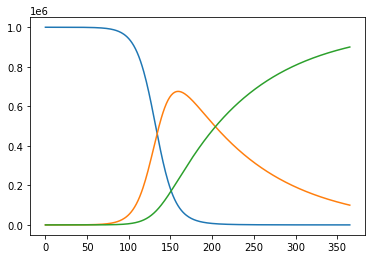

In [18]:
from matplotlib import pyplot as plt
plt.plot(S)
plt.plot(I)
plt.plot(R)
#What is bad?
#no legend
#no labels
#no title
#no units on axes
#maybe we should try a log-scale? Maybe not?

#Good news, we will learn how to fix all of these issues in a couple of weeks
#you will be able to make beautiful aesthetic data visualizations

## Other discrete time models

### Lotka-Volterra Predatory Prey Model

Here we let $H$ be the population of a prey species and $P$ be the population of the predator species.

\begin{align*}
H_{t+1}-H_t&=\alpha H_t - \beta H_t P_t\\
P_{t+1}-P_t&=\gamma H_t P_t - \delta P_t
\end{align*}



## Social Science: The Daley-Kendall Model
___
![rumor](http://www.thatsnonsense.com/wp-content/uploads/2012/01/rumours.jpg)

The flow of information through society impacts all of us, whether it be through malicious rumors about us, government propaganda, or fake news cites attempting to influence the government. Daley and Kendall formulated a basic model for the spread of rumors that we can build new models from. Their model has three compartments:
1. Ignorants (I): these are people ignorant of the rumor. 
2. Spreaders (S): these are people actively spreading the rumor.
3. Stiflers (R): there are people who are bored with the rumor.

More interesting than the compartments of the models are the rules in which they interact:
$$I + S \to S + S,$$
$$S + S \to S + R,$$
$$R + S \to R + R.$$

This leads to the following equations:
\begin{align*}
I_{t+1}-I_{t}&=-\beta I_tS_t\\
S_{t+1}-S_t&=\beta I_tS_t - \alpha S_t(S_t+R_t)\\
R_{t+1}-R_{t}&=\alpha S_t(S_t+R_t)
\end{align*}

# Fibonacci Numbers and Prime Numbers

1) Create a list of the first 10 prime numbers


In [19]:
N=10

primes=[] #list to store the primes
candidate = 2
while (len(primes)<N):
    is_prime=True
    for i in range(2,candidate):
        if (candidate %i==0):
            is_prime=False
    if is_prime==True:
        primes.append(candidate)
    candidate +=1
            

In [20]:
primes

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

2) The  Fibonnaci numbers are given by $a_1=a_2=1$, $a_{n}=a_{n-1}+a_{n-2}$ for $n\geq 2$.

Create a list of the first ten Fibonnaci numbers

In [25]:
N=10
Fib=[1,1]
for i in range(2,N):
    Fib.append(Fib[i-1]+Fib[i-2])

In [26]:
Fib

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]